# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/datasets/real_estate_data.csv', '\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.duplicated().sum()

0

### Вывод

Изучив датафрейм мы видим архив объявлений по продаже квартир, каждое объявление описывается 22 признаками. В данных имеется множество пропусков, названия столбцов некорректы, имеется вещественный тип данных. Дубликатов в данных нет.  

План выполнения проекта:  

1. Изучение и заполнение пропущенных значений;
2. Обработка некорректных и несоответствующих реальности данных;
3. Изменение типа данных;
4. Дополнение датафрейма столбцами на основе представленных данных;
5. Визуализация данных, обработка аномальных и выбивающихся значений;
6. Проведение исследовательского анализа данных и выявление взаимосвязей.
7. Заключительный ввод.

## Предобработка данных

Для начала приведём к нижнему регистру название столбца с расстоянием до центра.

In [5]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) # переименовали столбец

И отобразим уникальные значения всех столбцов.

In [6]:
for column in df.columns: # чтобы не перебирать по одному, применили цикл
    print(column)
    print(df[column].sort_values().unique()) # уникальные значения с сортировкой по возрастанию
    print()

total_images
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]

last_price
[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]

total_area
[ 12.   13.   13.2 ... 631.  631.2 900. ]

first_day_exposition
['2014-11-27T00:00:00' '2014-11-29T00:00:00' '2014-12-04T00:00:00' ...
 '2019-05-01T00:00:00' '2019-05-02T00:00:00' '2019-05-03T00:00:00']

rooms
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]

ceiling_height
[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3

### Обработка пропущенных и некорректных значений

In [7]:
df.isna().sum() #нашли пропуски в датафрейме

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вычислим процент пропусков в датафрейме.

In [8]:
((df.isna().sum() / len(df)) * 100).round(1)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
city_centers_nearest    23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

Пропущенные значения имеются в колонках:

* ceiling_height
* floors_total
* living_area
* is_apartment
* kitchen_area
* balcony 
* locality_name
* airports_nearest
* city_centers_nearest
* parks_around3000 
* parks_nearest 
* ponds_around3000
* ponds_nearest
* days_exposition

Вероятно, отсутствующие значения в balcony, parks_around3000, ponds_around3000 говорят о том, что балконов, парков и водоёмов поблизости нет и пропуски можно заменить на 0.

In [9]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Пустые значения в  locality_name заменим на "Не задано".

In [10]:
df['locality_name'] = df['locality_name'].fillna("Не задано")

Проверим, есть ли некорректные значения этажности домов(этаж квартиры больше количества этажей).

In [11]:
len(df.query('floor > floors_total'))

0

Таких значений нет. Попробуем заполнить NaN средним значением, взяв за основу населённый пункт и расстояние до центра.

In [12]:
df['floors_total'] = df['floors_total'].fillna(df.groupby(['locality_name', 'city_centers_nearest'])['floors_total'].transform('mean'))

In [13]:
df['floors_total'].isna().sum()

21

Таким образом мы заполнили 65 пропусков в floors_total. Остальные данные удалим.

In [14]:
df.dropna(subset = ['floors_total'], inplace = True)

Посмотрим, каким значением можно заменить пропуски в ceiling_height.

In [15]:
df['ceiling_height'].describe()

count    14503.000000
mean         2.771507
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значение нам подходит, так как разброс значений от 1 до 100м, а это значит, что среднее значение исказит информацию. К тому же это нормальная высота потолков для данного климатического района по СНиП 23-01-99. Но сначала допустим, что максимальная и минимальная высота потолков не регламентируется, и мы рассматриваем в том числе апартаменты и крошечные студии. Возьмём за минимальное значение 2.5м, а значения более 25 метров представим как ошибочные и разделим на 10.

In [16]:
df.loc[df['ceiling_height'] > 25, 'ceiling_height'] = df.loc[df['ceiling_height'] > 25, 'ceiling_height']/ 10

In [19]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Пропущенные значения в колонке living_area заполним средним соотношением живой площади к общей.

In [21]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * (df['living_area'] / df['total_area']).mean())

In [22]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,89.798311,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.437478,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Вероятно, что в  колонках is_apartment, studio данные не указали намеренно, посчитав логичным не заполнять этот параметр, т.к. это обычная квартира. Значит мы могли бы заменить пропуски в is_apartment на False.

In [23]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Аналогичным методом провернём замену в studio. Только сачала проверим, есть ли в студиях больше одной комнаты.

In [24]:
len(df.query('studio == True and rooms > 1'))

0

In [25]:
df['studio'] = df['studio'].fillna(False)

Заполнить пропуски в kitchen_area мы можем медианным значением.

In [26]:
df['kitchen_area']= df['kitchen_area'].fillna(df['kitchen_area'].median())

Пропуски в airports_nearest , city_сenters_nearest , parks_nearest , ponds_nearest не позаолят изменить тип данных, поэтому заменим NaN на нетипичное значение (-1) и оставим как есть, изменения данных могут исказить статистику.

In [27]:
df_columns = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']
for i in df_columns:
    df[i] = df[i].fillna(-1)

Допустим, что пропуски days_exposition имеются по причине актуальности объявлений. Их мы можем заменить на нетипичное значение (-1) и обработать с помощью медианного значения по колонке locality_name.

In [28]:
df['days_exposition'] = df['days_exposition'].fillna(df.groupby(['locality_name'])['days_exposition'].transform('median'))

In [29]:
df['days_exposition'].isna().sum()

80

Оставшиеся пропуски заменим медианным значением по столбцу.

In [30]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

In [31]:
df['days_exposition'].isna().sum()

0

Рассмотрим населённые пункты, названия которых записаны в разной форме.

In [33]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Не задано', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской 

Все населённые пункты начинаются с заглавной буквы, но могут быть как с указанием типа, так и без. Исправим это, избавимся от пробелов и заменим "ё" на "е". 

In [34]:
df['locality_name'] = df['locality_name'].str.replace('\\bё\\b', 'е') #заменили ё на е
df['locality_name'] = df['locality_name'].str.replace('\\bсело\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bсадовое товарищество\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bпосёлок станции\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bпосёлок\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bпосёлок городского типа\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bдеревня\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bгородской посёлок\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bгородского типа\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bпоселок\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bпри железнодорожной станции\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bстанции\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bкоттеджный\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bгородской\\b', '')
df['locality_name'] = df['locality_name'].str.replace('\\bимени\\b', '')

In [35]:
df['locality_name'] = df['locality_name'].str.strip() # избавились от пробелов

In [36]:
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

### Изменение типа данных

Осталось заменить вещественный тип данных на int в оставшихся колонках.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23678 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23678 non-null int64
last_price              23678 non-null float64
total_area              23678 non-null float64
first_day_exposition    23678 non-null object
rooms                   23678 non-null int64
ceiling_height          23678 non-null float64
floors_total            23678 non-null float64
living_area             23678 non-null float64
floor                   23678 non-null int64
is_apartment            23678 non-null bool
studio                  23678 non-null bool
open_plan               23678 non-null bool
kitchen_area            23678 non-null float64
balcony                 23678 non-null float64
locality_name           23678 non-null object
airports_nearest        23678 non-null float64
city_centers_nearest    23678 non-null float64
parks_around3000        23678 non-null float64
parks_nearest           23678 non-null float64
ponds_around300

Сразу определим тип данных в колонках.
* total_images - количественный
* last_price - количественный
* total_area - количественный
* first_day_exposition - datetime
* rooms - количественный
* ceiling_height - количественный
* floors_total - количественный
* living_area - количественный
* floor - количественный
* is_apartment - логический
* studio - логический
* open_plan - логический
* kitchen_area - количественный
* balcony - количественный
* locality_name - категориальный
* airports_nearest - количественный
* city_centers_nearest - количественный
* parks_around3000 - количественный
* parks_nearest - количественный
* ponds_around3000 - количественный
* ponds_nearest - количественный
* days_exposition - количественный

In [39]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [40]:
columns = ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for q in columns:
    df[q] = df[q].apply(lambda x: int(x))

In [41]:
df = df.astype({'is_apartment':'bool', 'studio':'bool', 'open_plan':'bool'}) #изменение типа данных

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23678 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23678 non-null int64
last_price              23678 non-null int64
total_area              23678 non-null int64
first_day_exposition    23678 non-null datetime64[ns]
rooms                   23678 non-null int64
ceiling_height          23678 non-null int64
floors_total            23678 non-null int64
living_area             23678 non-null int64
floor                   23678 non-null int64
is_apartment            23678 non-null bool
studio                  23678 non-null bool
open_plan               23678 non-null bool
kitchen_area            23678 non-null int64
balcony                 23678 non-null int64
locality_name           23678 non-null object
airports_nearest        23678 non-null int64
city_centers_nearest    23678 non-null int64
parks_around3000        23678 non-null int64
parks_nearest           23678 non-null int64
ponds_around3000        23678

In [43]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Проверим, появились ли дубликаты после обработки данных.

In [38]:
df.duplicated().sum()

0

In [39]:
df.drop_duplicates().reset_index(drop=True) #удаление дубликатов с изменением индексов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2,16,51,8,False,...,25,0,Санкт-Петербург,18863,16028,1,482,2,755,95
1,7,3350000,40,2018-12-04,1,2,11,18,1,False,...,11,2,Шушары,12817,18603,0,-1,0,-1,81
2,10,5196000,56,2015-08-20,2,2,5,34,4,False,...,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24,3,2,14,89,9,False,...,9,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,...,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23673,9,9700000,133,2017-03-21,3,3,5,73,3,False,...,13,0,Санкт-Петербург,24665,4232,1,796,3,381,95
23674,14,3100000,59,2018-01-15,3,2,5,38,4,False,...,8,0,Тосно,-1,-1,0,-1,0,-1,45
23675,18,2500000,56,2018-02-11,2,2,3,29,1,False,...,9,0,Рождествено,-1,-1,0,-1,0,-1,99
23676,13,11475000,76,2017-03-28,2,3,17,43,12,False,...,23,2,Санкт-Петербург,39140,10364,2,173,3,196,602


### Вывод

В ходе предобработки мы избавильсь от 21 строки, восполнили пропущенные значения, заменили некорректные и изменили тип данных.

## Расчёты и добавление результатов в таблицу

Нам нужно добавить в имеющийся датафрейм:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Цену квадратного метра узнаем разделив стоимость квартиры на общую площадь.

In [40]:
df['price_square_meter'] = df['last_price'] / df['total_area'].round() 
df['price_square_meter'].astype(int) # сразу заменили тип данных, т.к. при делении он снова преобразовался в вещественный

0        120370
1         83750
2         92785
3        408176
4        100000
          ...  
23694     72932
23695     52542
23696     44642
23697    150986
23698     42187
Name: price_square_meter, Length: 23678, dtype: int64

Добавим столбцы с днём недели, месяцем и годом публикации.

In [41]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Введём категоризацию вариантов этажа квартиры. Для этого применим функцию.

In [42]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_category'] = df.apply(floor_category,axis=1)
df['floor_category'].value_counts() 

другой       17421
последний     3342
первый        2915
Name: floor_category, dtype: int64

Добавим колонку с соотношением жилой площади к общей.

In [43]:
df['area_ratio'] = (df['living_area'] / df['total_area']).round(2)

И соотношение площади кухни к общей.

In [44]:
df['kitchen_area_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

Теперь можем взглянуть на отредактированную таблицу.

In [45]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,floor_category,area_ratio,kitchen_area_ratio
0,20,13000000,108,2019-03-07,3,2,16,51,8,False,...,2,755,95,120370.370370,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,2,11,18,1,False,...,0,-1,81,83750.000000,1,12,2018,первый,0.45,0.28
2,10,5196000,56,2015-08-20,2,2,5,34,4,False,...,2,574,558,92785.714286,3,8,2015,другой,0.61,0.14
3,0,64900000,159,2015-07-24,3,2,14,89,9,False,...,3,234,424,408176.100629,4,7,2015,другой,0.56,0.06
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,...,1,48,121,100000.000000,1,6,2018,другой,0.32,0.41
5,10,2890000,30,2018-09-10,1,2,12,14,5,False,...,0,-1,55,96333.333333,0,9,2018,другой,0.47,0.30
6,6,3700000,37,2017-11-02,1,2,26,10,6,False,...,0,-1,155,100000.000000,3,11,2017,другой,0.27,0.38
7,5,7915000,71,2019-04-18,2,2,24,40,22,False,...,0,-1,95,111478.873239,3,4,2019,другой,0.56,0.25
8,20,2900000,33,2018-05-23,1,2,27,15,26,False,...,0,-1,189,87878.787879,2,5,2018,другой,0.45,0.24
9,18,5400000,61,2017-02-26,3,2,9,43,7,False,...,0,-1,289,88524.590164,6,2,2017,другой,0.70,0.10


## Исследовательский анализ данных

Изучим параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы и диаграммы размаха для каждого параметра и избавимся от выбросов.

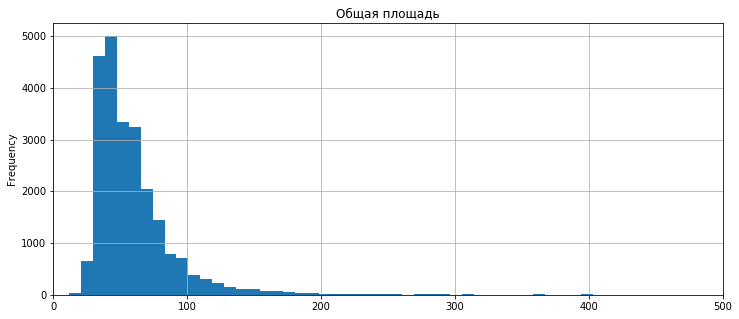

In [46]:
df['total_area'].plot(kind='hist', grid=True, bins=100, xlim=(0,500), figsize=(12,5), title='Общая площадь')

 Мы получили гистограмму вполне реалистичную гистограмму с длинным хвостом. Площадь большинства квартир составляет 30-60кв.м. Посмотрим на выбивающиеся значения.

(0, 200)

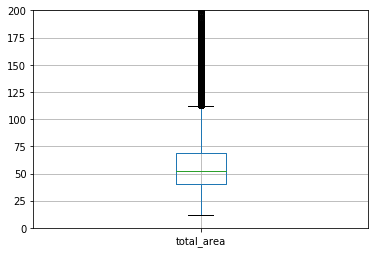

In [47]:
df.boxplot('total_area')
plt.ylim(0, 200)

Видим выбросы, начинающиеся от 120кв.м, избавимся от них. Веротно, это частные дома, квартиры с большой площадью, либо данные указаны неверно.

In [48]:
len(df)

23678

In [49]:
len(df.query('total_area <= 120'))

22627

In [50]:
(len(df) - len(df.query('total_area <= 120'))) / len(df) * 100

4.438719486443111

Таким образом мы удалим 4.4% данных.

In [51]:
df = df.query('total_area <= 120')

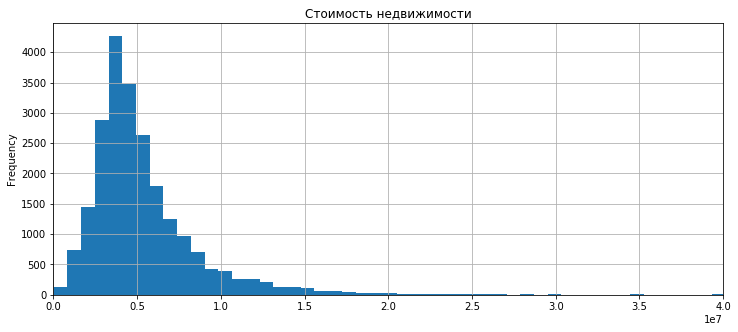

In [52]:
df['last_price'].plot(kind='hist', grid=True, bins=100, xlim=(0,40000000), figsize=(12,5), title='Стоимость недвижимости')

(-100000, 20000000)

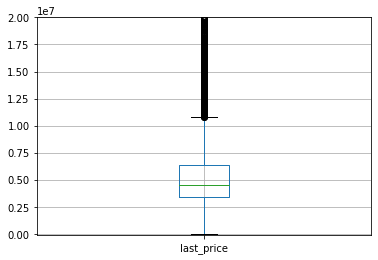

In [53]:
df.boxplot('last_price')
plt.ylim(-100000, 20000000)

Нормальные значения находятся в интервале от 0 до 11 млн. Но наименьшее значение 0, посмотрим на самую дешёвую недвижимость в объявлениях (например квартиры стоимостью дешевле 50000).

In [54]:
df.query('last_price < 50000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,floor_category,area_ratio,kitchen_area_ratio
8793,7,12190,109,2019-03-20,2,2,25,32,25,False,...,0,-1,8,111.834862,2,3,2019,последний,0.29,0.37


Одна квартира с площадью 109 кв.м. и жилой всего лишь 32, да ещё и по такой цене - фантастика. Или мошенническая деятельность с целью управления рынком недвижимости. Удалим это значение.

In [55]:
(len(df) - len(df.query('50000 < last_price  <= 11000000'))) / len(df) * 100 # процент выбросов

5.855835948203474

In [56]:
df = df.query('50000 < last_price  <= 11000000')

Построим гистограмму по стоимости за квадратный метр.

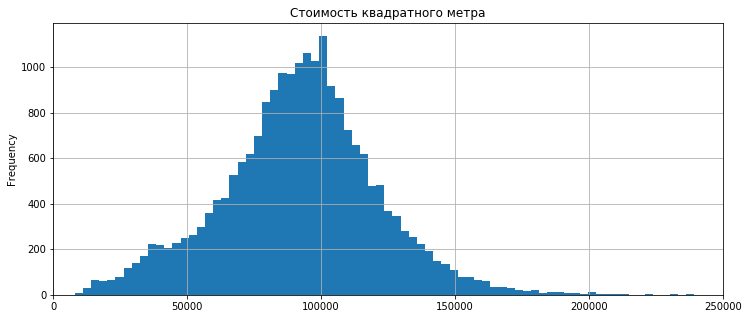

In [57]:
df['price_square_meter'].plot(kind='hist', grid=True, bins=100, xlim=(0,250000), figsize=(12,5), title='Стоимость квадратного метра')

Пик приходится на 100000 за 1кв.м., большинство квартир в интервале от 50000 до 140000 за кв.м.

count     21302.000000
mean      92054.923295
std       29427.865140
min        7962.962963
25%       74715.038314
50%       92857.142857
75%      109325.581395
max      312240.000000
Name: price_square_meter, dtype: float64

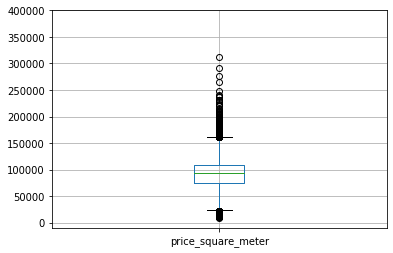

In [58]:
df.boxplot('price_square_meter')
plt.ylim(-10000, 400000)
df['price_square_meter'].describe()

Удаляем выбросы.

In [59]:
(len(df) - len(df.query('25000 < price_square_meter < 160000'))) / len(df) * 100 # процент выбросов

2.8588864895314994

In [60]:
df = df.query('25000 < price_square_meter < 160000')

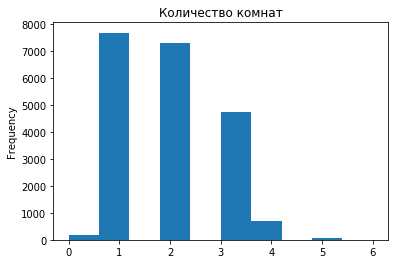

In [61]:
df['rooms'].plot(kind='hist', title='Количество комнат')

Львиную долю в архиве занимают квартиры с одной и двумя комнатами. Небольшую часть составляют студии (0 комнат), ещё меньшую - квартиры с 5-ю комнатами.

С высотой потолков мы уже сталкивались на этапе предобработки: пропуски заменяли медианой, а потолки выше 25 метров укорачивали в 10 раз.

count    20693.000000
mean         2.087324
std          0.570101
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         25.000000
Name: ceiling_height, dtype: float64

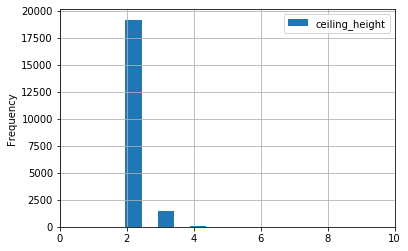

In [62]:
df.plot(y='ceiling_height', kind='hist', grid=True, xlim=(0,10), bins=50)
df['ceiling_height'].describe()

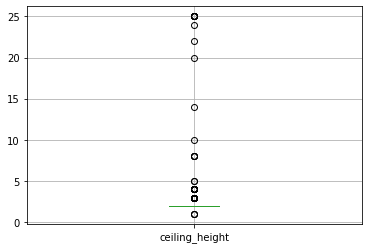

In [63]:
df.boxplot('ceiling_height')

Изучим время продажи квартиры. 

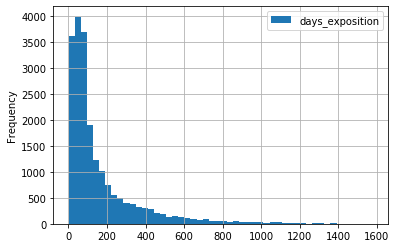

In [64]:
df.plot(y='days_exposition', kind='hist', grid=True, bins=50)

Вполне правдоподобное распределение времени размещения с длинным хвостом, достигающим 4 лет. Большинство объявлений актуальны в пределах 200 дней. 

count    20693.000000
mean       163.254724
std        198.060144
min          1.000000
25%         45.000000
50%         95.000000
75%        193.000000
max       1580.000000
Name: days_exposition, dtype: float64

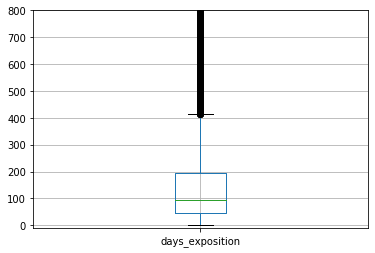

In [65]:
df.boxplot('days_exposition')
plt.ylim(-10,800)
df['days_exposition'].describe()

Разница между средним и медианой обуслолена хвостом с высокими значениями. В среднем продажа квартиры длится от 45 до 193 дней (1 и 3 квартили), тогда как диапазон нормальных значений от 0 до 410 дней. Быстрой можно считать продажу состоявшуюся до 45 дней со дня добавления объявления, медленной - от 193 дней.

In [66]:
(len(df) - len(df.query('days_exposition <= 410'))) / len(df) * 100 # процент выбросов

10.008215338520273

In [67]:
(len(df) - len(df.query('days_exposition <= 600'))) / len(df) * 100 # процент выбросов

4.600589571352631

Процент выброса огромен, отфильтруем до 600 дней - так мы не потеряем ценные данные и отбросим часть аномальных значений.

Изучим, какие факторы влияют на стоимость квартир.

In [68]:
df[['last_price', 'total_area','rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.723403,0.478836,0.109275
total_area,0.723403,1.000000,0.807589,-0.017123
rooms,0.478836,0.807589,1.000000,-0.009665
city_centers_nearest,0.109275,-0.017123,-0.009665,1.000000


Коэфициент корреляции показывает, что стоимость квартир зависит от площади, в меньшей степени цена зависит от количествава комнат.  Так же видим сильную зависимоть количества комнат от общей площади.

Теперь оценим стоимость в зависимости от категории этажа.

Text(0, 0.5, 'Категория этажа')

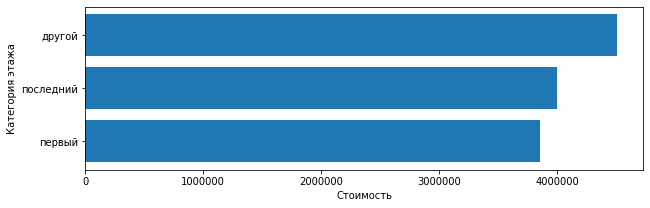

In [69]:
floor_price = df[['floor_category', 'last_price']].groupby(['floor_category']).median().sort_values('last_price')
plt.figure(figsize=(10,3))
plt.barh( floor_price.index, floor_price['last_price'])
plt.xlabel('Стоимость')
plt.ylabel('Категория этажа')

Видим, что ниже всего стоимость квартир на первом этаже, немного выше на последнем.

Зависимость стоимости от даты размещения объявления.

In [70]:
df[['day', 'month','year', 'last_price']].corr()

,day,month,year,last_price
day,1.000000,0.008723,-0.005431,-0.004973
month,0.008723,1.000000,-0.265562,0.000172
year,-0.005431,-0.265562,1.000000,0.007385
last_price,-0.004973,0.000172,0.007385,1.000000


Коэфициент корреляции не выявляет взаимосвязь между днём, месяцем и годом публикации со стоимостью квартир. Для визуализации построим матрицу рассеивания. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94251b7cd0>,
      dtype=object)

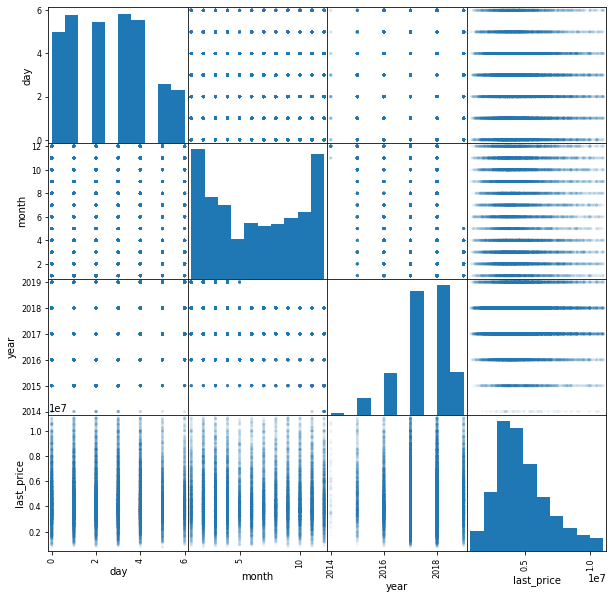

In [71]:
date = ['day', 'month', 'year', 'last_price']
pd.plotting.scatter_matrix(df[date], figsize=(10, 10), alpha=0.05)

Более отчетливо видно, что заявленная стоимость квартир ниже в объявлениях, размещённых выходные дни, самые низкие цены на недвижимость в мае и декабре, тогда как самые высокие с февраля по март. До 2018 года видим тенденцию к росту цен, в 2019 году стоимость незначительно снизилась.

Теперь выберем 10 населённых пунктов с наибольшим числом объявлений.

In [72]:
price = df.loc[:, ['locality_name', 'price_square_meter']]
price = price.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean'])
price.columns = ['count', 'price_square_meter']
top = price.sort_values(by='count', ascending=False)[:10]
top

,count,price_square_meter
locality_name,,
Санкт-Петербург,13129,103920.597808
Мурино,586,86677.958763
Кудрово,468,95638.381258
Шушары,438,78932.857393
Всеволожск,394,67551.417955
Колпино,335,75535.215462
Пушкин,334,100334.574580
Парголово,326,90833.211024
Гатчина,301,69328.308959


И первое место по стоимости за один квадратный метр занимает Санкт-Петербург, что неудивительно, совсем немного уступает Пушкин. Завершает топ-10 Выборг.

Изучим предложения квартир: выделите квартиры в Санкт-Петербурге и выясним, какая область входит в центр.

In [73]:
spb = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest != 1') 
# исключим нетипичные значения, которыми мы ранее заменяли пропуски

In [74]:
price_spb = spb.loc[:, ['locality_name', 'city_centers_nearest','last_price']]

In [75]:
price_spb['city_centers_nearest'] = (price_spb['city_centers_nearest']/1000).round().astype(int) # oкруглим расстояние до центра.

In [76]:
pivot = price_spb.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean')

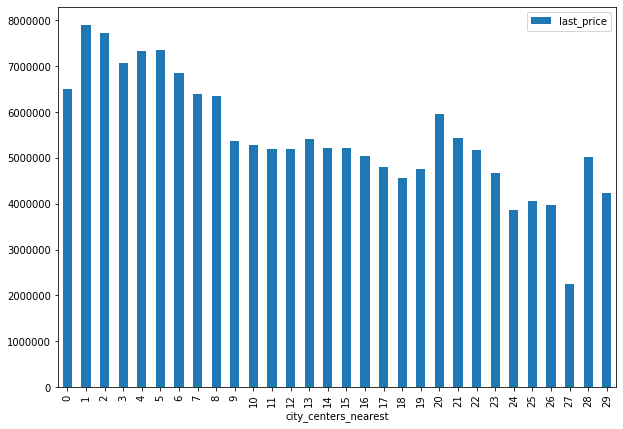

In [77]:
pivot.plot(y='last_price', kind='bar', figsize=(10, 7))

Несмотря на небольшие колебания цены на 3-5 и 13 км отмечается стойкая тенденция к снижению, но заметно резкое снижение цены после 8 км, эту область и рассмотрим как центр.

In [78]:
spb_center = spb.query('city_centers_nearest != 1 and city_centers_nearest < 9')

Рассмотрим гистограммы центра города (красный цвет) и всего Санкт-Петербурга (синий цвет).

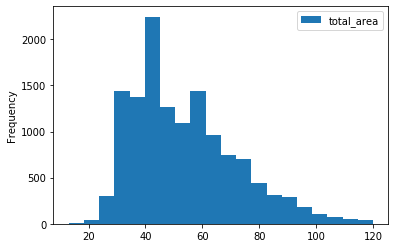

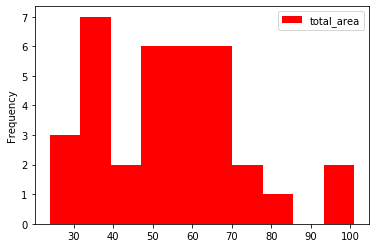

In [79]:
spb.plot(y='total_area', kind='hist', bins=20)
spb_center.plot(y='total_area', kind='hist', colormap='bwr_r')

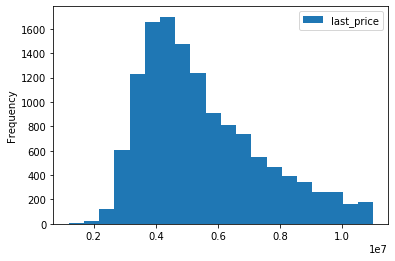

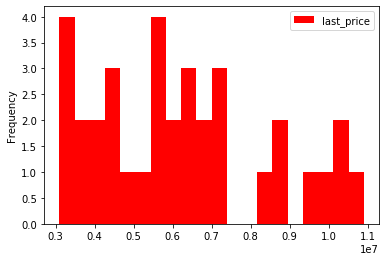

In [80]:
spb.plot(y='last_price', kind='hist', bins=20)
spb_center.plot(y='last_price', kind='hist', bins=20, colormap='bwr_r')

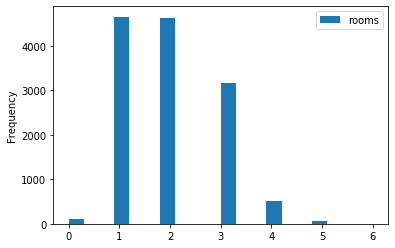

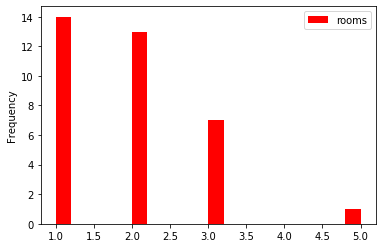

In [81]:
spb.plot(y='rooms', kind='hist', bins=20)
spb_center.plot(y='rooms', kind='hist', bins=20, colormap='bwr_r')

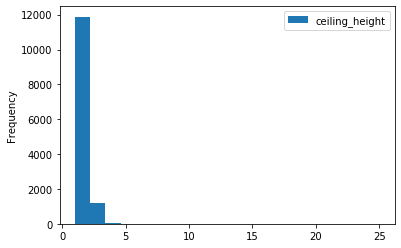

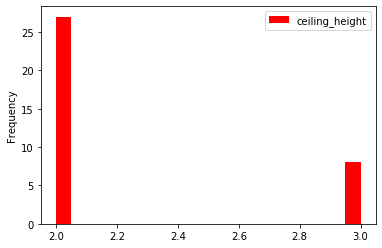

In [82]:
spb.plot(y='ceiling_height', kind='hist', bins=20)
spb_center.plot(y='ceiling_height', kind='hist', bins=20, colormap='bwr_r')

Большинство картир в центре Санкт-Петербурга площадью 33кв.м., так же много квартир 50-70кв.м. Цены на недвижимость начинаются от 3 млн. В центре нет студий, большаяя часть квартир с 1 или 2 комнатами, а высота потолков стандартная 2.65.

In [83]:
spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.822832,0.797849,0.132201
last_price,0.822832,1.000000,0.546833,0.150166
rooms,0.797849,0.546833,1.000000,0.088385
ceiling_height,0.132201,0.150166,0.088385,1.000000


In [84]:
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.829394,0.828497,0.367144
last_price,0.829394,1.000000,0.540774,0.301777
rooms,0.828497,0.540774,1.000000,0.289890
ceiling_height,0.367144,0.301777,0.289890,1.000000


Как мы видим из коэфициентов корреляции, зависимость стоимости от общей площади одинакова для центра и всего Санкт-Петербурга, в меньшей степени взаимосвязь прослеживается от количества комнат. В центре города всота потолков ценится немного больше, но в целом на цену не влияет.

## Общий вывод

При знакомстве с датафреймом изучили архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, что впоследствии поможет определять рыночную стоимость объектов недвижимости. Были обнаружены множественные пропуски, некорректные, а так же аномальные значения.  

На этапе предобработки пропущенные значения были заменены значениями по доступным данным из датасета. Изменены типы данных, обработаны выбросы и аномальные значения, установлены связи между разными параметрами и построены графики.  

На третьем шаге были посчитаны и добавлены в таблицу:
1. Цена квадратного метра;
2. День недели, месяц и год публикации объявления;
3. Этаж квартиры; варианты — первый, последний, другой;
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.  

В ходе исследовательского анализа мы выяснили, что в среднем продажа квартиры длится от 45 до 193, стоимость квартир зависит от площади и в  меньшей степени - от количествава комнат. На первом этаже квартиры стоят дешевле. На первом этаже квартиры стоят дешевле. Стоимость квартир с 2014 по 2018 постепенно росла, в 2019 году цена немного снизилась. В мае и декабре квартиры продаются по самой низкой стоимости, а с февраля по март - самой высокой. Квартиры, выставленные на продажу в выходные дни в среднем продаются  дешевле, чем в пик - во вторник. Самые дорогие квартиры находятся в Санкт-Петербурге и Пушкине, а самые дешевые в Выборге. Граница центра - 8 километров. Цены в центре начинаются от 3 млн. Чаще встречаются одна- и двухкомнатные квартиры, студий нет. На стоимость как в центре, так и по городу влияет общая площадь и меньше всего имеет значение всота потолков.